# Ejemplo de diseño de un filtro FIR y efectos del enventanado
*Ignacio Díaz Blanco, 2019. Universidad de Oviedo.

Ejemplo de diseño de un filtro FIR pasabajos con una frecuencia de corte dada y aplicación del filtro a una señal sintética con tres armónicos. 

En el ejemplo se muestra también el efecto en el dominio de la frecuencia (lóbulos de dispersión espectral, *spectral leakage*) para diseños basados en tres tipos de ventanas: *rectangular*, *Hanning* y *Hamming*

In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

%matplotlib inline

Frecuencia de muestreo = 5.00 Hz
Periodo de muestreo = 0.20 seg.

Armónicos de la señal, expresados en Hz y normalizados (0,1):
Armonico 1: 0.05 Hz (0.01 p.u.)
Armonico 2: 0.50 Hz (0.10 p.u.)
Armonico 3: 1.00 Hz (0.20 p.u.)


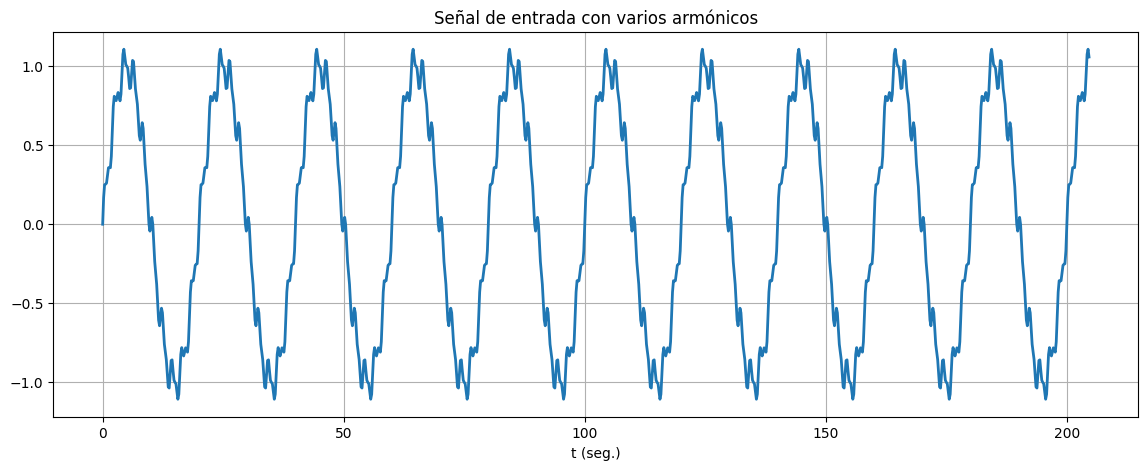

In [2]:
# PARÁMETROS DE LA ADQUISICIÓN DE DATOS
Fm = 5;         # Frecuencia de muestreo
Tm = 1/Fm       # Periodo de muestreo
N  = 1024;      # Número de puntos de la secuencia (suelen capturarse en 
                # bloques con un numero potencia de 2, 
                # porque el cálculo de la fft es más rápido)

# SEÑAL DE ENTRADA
# un armónico de amplitud 1 fundamental al 1% de Fm (frec. de muestreo)
# un armónico de amplitud 0.1 a una frecuencia 10% de Fm
# un armónico de amplitud 0.05 a una frecuencia 20% de Fm

t = np.arange(N)*Tm;   # vector de tiempos en segundos
k = np.arange(N)       # vector de muestras
y = np.sin(2*pi*k*0.01)+0.1*np.sin(2*pi*k*0.1)+0.05*np.sin(2*pi*k*0.2);

print('Frecuencia de muestreo = %1.2f Hz'%(Fm));
print('Periodo de muestreo = %1.2f seg.'%(Tm))
print('')
print('Armónicos de la señal, expresados en Hz y normalizados (0,1):')
print('Armonico 1: %1.2f Hz (%1.2f p.u.)'%(0.01*Fm,0.01))
print('Armonico 2: %1.2f Hz (%1.2f p.u.)'%(0.1*Fm,0.1))
print('Armonico 3: %1.2f Hz (%1.2f p.u.)'%(0.2*Fm,0.2))


# Dibujamos la señal (secuencia discreta)
plt.figure(1,figsize=(14,5)); 
plt.clf();
plt.plot(t,y,linewidth=2); 
plt.grid(True); 
plt.axis('tight')
plt.xlabel('t (seg.)')
plt.title(u'Señal de entrada con varios armónicos');


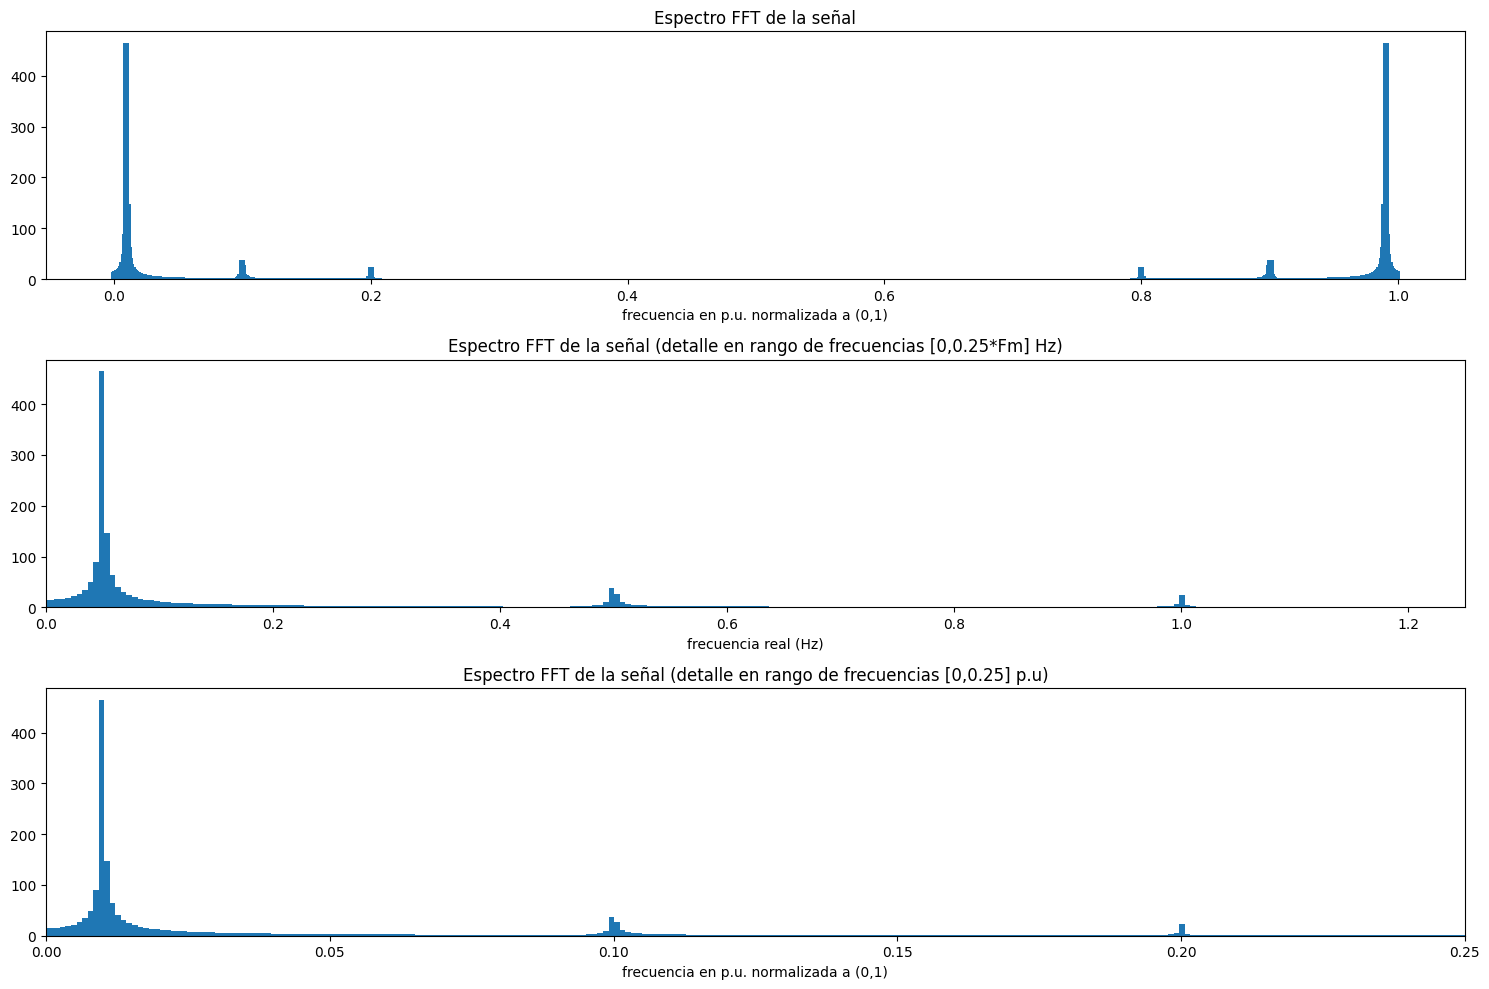

In [3]:

# Dibujamos la respuesta en frecuencia (frec normalizada a rango 0,1)
# con esta normalización, asignamos 1 <--> Fm
plt.figure(2,figsize=(15,10));
plt.subplot(3,1,1)
f = np.arange(0,1,1/N)        # rango de frecuencias normalizadas: el primer elemento (0) 
                              # representa la continua. El último (N-1)/N es justo el
                              # anterior al que representaría la frecuencia de 
                              # muestreo
plt.bar(f,abs(np.fft.fft(y)),width=Fm/N); 
plt.xlabel('frecuencia en p.u. normalizada a (0,1)'); 
plt.title('Espectro FFT de la señal')


plt.subplot(3,1,2)
plt.bar(f*Fm,abs(np.fft.fft(y)),width=Fm/N); 
plt.xlabel('frecuencia real (Hz)'); 
plt.axis(xmin=0,xmax=0.25*Fm)
plt.title('Espectro FFT de la señal (detalle en rango de frecuencias [0,0.25*Fm] Hz)')

plt.subplot(3,1,3)
plt.bar(f,abs(np.fft.fft(y)),width=1/N); 
plt.xlabel('frecuencia en p.u. normalizada a (0,1)'); 
plt.axis(xmin=0,xmax=0.25)
plt.title('Espectro FFT de la señal (detalle en rango de frecuencias [0,0.25] p.u)')


# evitamos que se solapen elementos
plt.tight_layout()



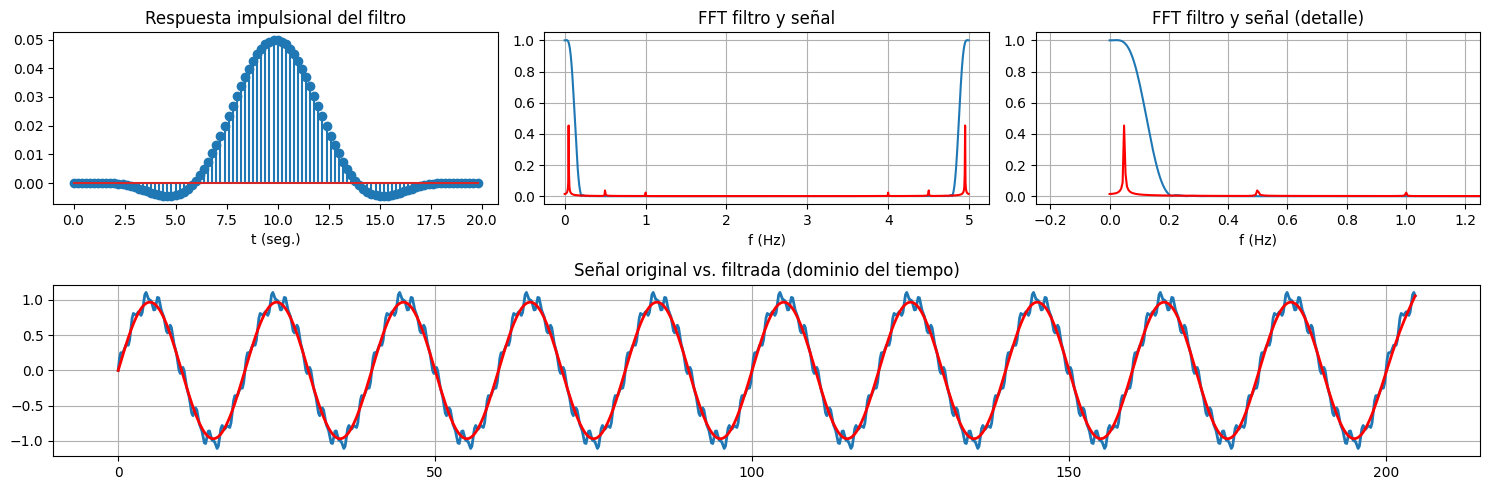

In [4]:

# Diseñamos un filtro de 100 coeficientes con una frecuencia de corte 
# del 5% de la frecuencia de Shannon 
# (lo que equivale al 2.5% de la frecuencia de muestreo)
Nf = 100;
b = sig.firwin(Nf,0.05,window='hann');



# Dibujamos la respuesta impulsional (los coeficientes) del filtro diseñado
plt.figure(4,figsize=(15,5)); 
plt.clf();
plt.subplot(2,3,1)
plt.stem(t[:Nf],b);
plt.title('Respuesta impulsional del filtro')
plt.xlabel('t (seg.)')



# Dibujamos la respuesta en frecuencia del filtro diseñado
plt.subplot(2,3,2)
plt.plot(f*Fm,abs(np.fft.fft(b,N)));   # Haciendo fft(b,N), extendemos la fft mediante 
                                       # zero-padding a N coeficientes (no solo 100)
                                       # la técnica de zero padding consiste en añadir
                                       # ceros a la señal hasta llegar a N y luego hacer
                                       # la fft. El resultado es una fft con N "bins" de
                                       # freciencia en lugar de 100. Al igual que antes,
                                       # el elemento N+1 representaría la frecuencia de
                                       # muestreo
plt.plot(f*Fm,abs(np.fft.fft(y,N)/N),color='r')                            
                            
plt.grid(True);

plt.title(u'FFT filtro y señal')
plt.xlabel('f (Hz)')

# Dibujamos la respuesta en frecuencia del filtro diseñado (DETALLE DE LA FIGURA ANTERIOR)
plt.subplot(2,3,3)
plt.plot(f*Fm,abs(np.fft.fft(b,N)));   # Haciendo fft(b,N), extendemos la fft mediante 
                                       # zero-padding a N coeficientes (no solo 100)
                                       # la técnica de zero padding consiste en añadir
                                       # ceros a la señal hasta llegar a N y luego hacer
                                       # la fft. El resultado es una fft con N "bins" de
                                       # freciencia en lugar de 100. Al igual que antes,
                                       # el elemento N+1 representaría la frecuencia de
                                       # muestreo
plt.plot(f*Fm,abs(np.fft.fft(y,N)/N),color='r')                            
plt.axis(xmax=Fm/4)           
plt.grid(True);

plt.title(u'FFT filtro y señal (detalle)')
plt.xlabel('f (Hz)')


# Obtenemos la señal filtrada
plt.subplot(2,1,2)
yf = sig.filtfilt(b,1,y);
plt.plot(t,y,linewidth=2);
plt.plot(t,yf,linewidth=2,color='r');
plt.axis('tight');
plt.grid(True);
plt.title(u'Señal original vs. filtrada (dominio del tiempo)')

plt.tight_layout()


En la figura de arriba observamos que el filtro **deja pasar el primer armónico** pero por el contrario filtra los otros dos. Esto lo vemos en frecuencia y en el tiempo

## Respuesta en frecuencia para varios tipos de ventanas

En las figuras de abajo se demuestra la diferencia en el comportamiento en frecuencia para tres filtros FIR con frecuencia de corte de 0.05 p.u y ventanas *rectangular*, *Hanning* y *Hamming*, respectivamente.

Vemos cómo el diseño con ventana rectangular (izquierda), que implica un truncamiento brusco en el dominio del tiempo,  se traduce en lóbulos en el dominio de la frecuencia. Estos lóbulos se reducen con los filtros de Hanning y Hamming (centro y derecha)

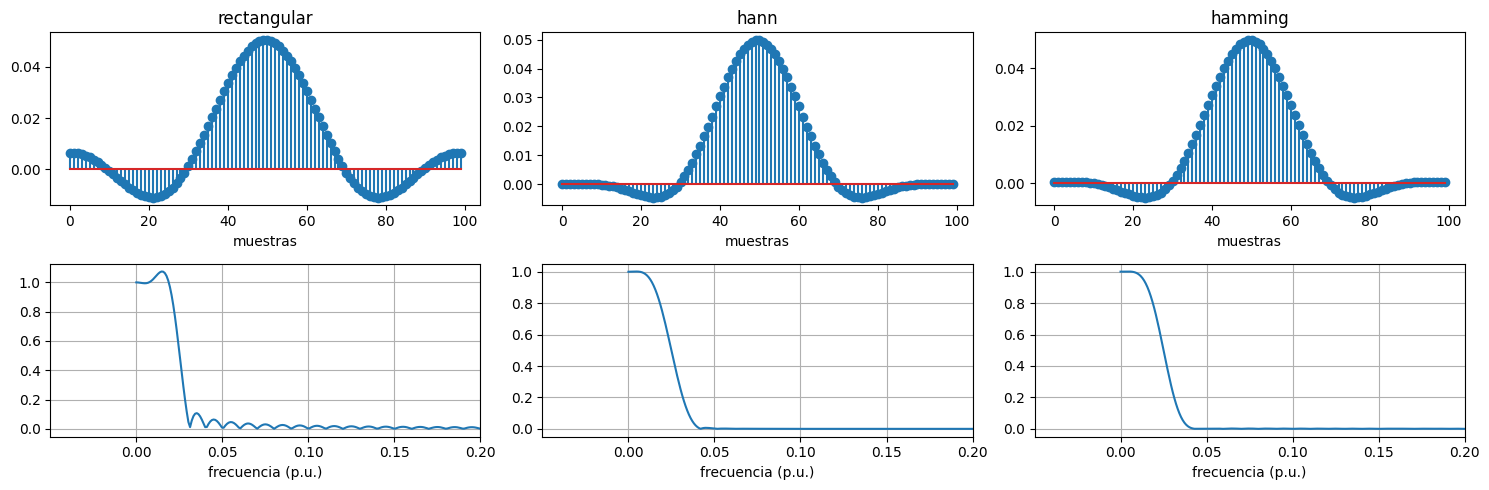

In [5]:

plt.figure(5,figsize=(15,5))
# Diseñamos un filtro de 100 coeficientes con una frecuencia de corte 
# del 5% de la frecuencia de Shannon 
# (lo que equivale al 2.5% de la frecuencia de muestreo)
Nf = 100;
i = 0
for tipo_filtro in ['rectangular','hann','hamming']: 
    i = i + 1
    b = sig.firwin(Nf,0.05,window=tipo_filtro);
    plt.subplot(2,3,i)
    plt.stem(np.arange(Nf),b)
    plt.title(tipo_filtro)
    plt.xlabel('muestras')
    plt.subplot(2,3,i+3)
    plt.plot(f,abs(np.fft.fft(b,N)))
    plt.xlabel('frecuencia (p.u.)')
    plt.axis(xmax=0.2)
    plt.grid(True)

plt.tight_layout()

In [6]:
%%html
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">"Ejemplo de diseño de un filtro FIR y efectos del enventanado"</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.